In [10]:
import sagemaker
import boto3
from sagemaker import Session

sagemaker_session = sagemaker.Session()
bucket = 'spcogni1'
subfolder = 'data'
role = sagemaker.get_execution_role()


In [29]:
#VIEWING THE CONTENTS OF OUR S3 BUCKET

s3 = boto3.client('s3')
contents = s3.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
for f in contents:
    print(f['Key'])

data/
data/file1.txt
data/file2.txt
data/file3.txt
data/file4.txt
data/file5.txt


In [31]:
#IMPORT DATA FROM 5 FILES IN S3 TO OUR NOTEBOOK AS A SINGLE STRING

import io
data = ''
files = ['file1','file2','file3','file4','file5']
for file in files:
    text = s3.get_object(Bucket = bucket,Key = 'data/'+str(file)+'.txt')
    text['Body']
    with io.FileIO('sample.txt', 'w') as file2:
        for i in text['Body']:
            file2.write(i)
    f = open("sample.txt", "r")
    data = data + f.read()

In [34]:
data

'Sardar Vallabhbhai Patel is known as the architect of independent India. Had it not been for his efforts, the various princely states of India would not have come together. Sardar Patel also worked for the welfare of the farmers. In order to pay homage to Patel and honour his contribution to the country, Narendra Modi announced the construction of a huge statue of this great Indian leader. The announcement was made in 2010 when Narendra Modi was the Chief Minister of Gujarat.Statue of Unity dedicated to Sardar Patel is known for its enormous structure and elaborate design. A lot of sweat and hard work went into the making of this structure. A team of artists, historians and architects was selected to further this task. They studied various statues of Sardar Patel set up in different parts of the country. Finally, the design suggested by sculptor, Ram V. Sutar was approved and the work for the construction of this unique statue began.The Statue of Unity is said to be a replica of the s

In [39]:
#CREATING A DATAFRAME OF LINES FROM OUR STRING OF COMPLETE DATA.

import pandas as pd
temp = io.StringIO(data)
df = pd.read_csv(temp, sep =".",header = None)
df = df.T

In [47]:
df.columns = ['sentence']
df

,sentence
0,Sardar Vallabhbhai Patel is known as the archi...
1,"Had it not been for his efforts, the various ..."
2,Sardar Patel also worked for the welfare of t...
3,In order to pay homage to Patel and honour hi...
4,The announcement was made in 2010 when Narend...
5,Statue of Unity dedicated to Sardar Patel is k...
6,A lot of sweat and hard work went into the ma...
7,"A team of artists, historians and architects ..."
8,They studied various statues of Sardar Patel ...
9,"Finally, the design suggested by sculptor, Ram V"


In [43]:
l = len(df)

30

In [ ]:
#REMOVING THE PUNCTUATIONS 
#PARSING SENTENCES AS SINGLE WORDS
#AND REMOVING STOPWORDS PERFORMING STEMMING


import re
import nltk
nltk.download('stopwords')    #<---- download stop words Eg. the/a/and etc.
from nltk.corpus import stopwords #<-- imports the downloaded stopwords
from nltk.stem.porter import PorterStemmer  #<-- takes only root word

corpus = []  #<---it will contain all our CLEANED sentences
for i in range(0,30):          #<---our data has 30 rows
  sentence = re.sub('[^a-zA-Z]',' ',str(df['sentence'][i]))       #<---remove the punctuations from each row      
  sentence = sentence.lower() 
  sentence = sentence.split() #<----- string to individual words
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  sentence = [ps.stem(word) for word in sentence if not word in set(all_stopwords)]
  sentence = ' '.join(sentence)
  corpus.append(sentence)

In [54]:
corpus

['sardar vallabhbhai patel known architect independ india',
 'effort variou princ state india would come togeth',
 'sardar patel also work welfar farmer',
 'order pay homag patel honour contribut countri narendra modi announc construct huge statu great indian leader',
 'announc made narendra modi chief minist gujarat',
 'statu uniti dedic sardar patel known enorm structur elabor design',
 'lot sweat hard work went make structur',
 'team artist historian architect select task',
 'studi variou statu sardar patel set differ part countri',
 'final design suggest sculptor ram v',
 'sutar approv work construct uniqu statu began',
 'statu uniti said replica statu sardar vallabhbhai patel instal ahmadabad intern airport',
 'statu much larger',
 'total height statu includ base',
 'base built statu high',
 'statu built stand tall height',
 'height statu draw attent',
 'tallest statu around globe',
 'statu uniti reflect sardar patel robust person',
 'statu seen wear dhoti head held high shawl sho

In [58]:
#SAVING THE RESULTS as results.txt INSIDE RESULTS FOLDER IN OUR S3 BUCKET.

result = (" ".join(corpus))
result

f = open("results.txt", "a")
f.write(result)

import os
boto3.resource('s3').Bucket(bucket).Object(os.path.join('results','results.txt')).upload_file('results.txt')

In [60]:
result

'sardar vallabhbhai patel known architect independ india effort variou princ state india would come togeth sardar patel also work welfar farmer order pay homag patel honour contribut countri narendra modi announc construct huge statu great indian leader announc made narendra modi chief minist gujarat statu uniti dedic sardar patel known enorm structur elabor design lot sweat hard work went make structur team artist historian architect select task studi variou statu sardar patel set differ part countri final design suggest sculptor ram v sutar approv work construct uniqu statu began statu uniti said replica statu sardar vallabhbhai patel instal ahmadabad intern airport statu much larger total height statu includ base base built statu high statu built stand tall height height statu draw attent tallest statu around globe statu uniti reflect sardar patel robust person statu seen wear dhoti head held high shawl shoulder hand side wear pair sandal height weight measur statu decid way stand i

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_words = le.fit_transform(result.split(" "))
encoded_words

array([ 92, 125,  76,  60,   8,  50,  51,  29, 126,  83, 103,  51, 136,
        17, 119,  92,  76,   3, 135, 130,  32,  73,  77,  45,  76,  46,
        20,  21,  71,  68,   5,  19,  48, 104,  36,  52,  62,   5,  64,
        71,  68,  15,  67,  37, 104, 123,  23,  92,  76,  60,  31, 107,
        30,  24,  63, 112,  39, 135, 132,  65, 107, 118,  10,  44,   8,
        97, 117, 108, 126, 104,  92,  76,  98,  26,  75,  21,  33,  24,
       109,  94,  85, 124, 111,   7, 135,  19, 122, 104,  13, 104, 123,
        90,  87, 104,  92, 125,  76,  55,   1,  57,   2, 104,  69,  61,
       120,  41, 104,  49,  12,  12,  14, 104,  43, 104,  14, 102, 115,
        41,  41, 104,  27,  11, 116, 104,   9,  35, 104, 123,  86,  92,
        76,  89,  80, 104,  96, 128,  25,  40,  42,  43,  99, 100,  38,
       101, 128,  74,  91,  41, 129,  66, 104,  22, 127, 102,  56,   4,
         0,  16,  18,  72,  58, 104, 134, 133,  59,  79,  47,   3, 134,
        28,  88,  93, 104, 123, 113, 123, 105,  86, 121,  80,  9

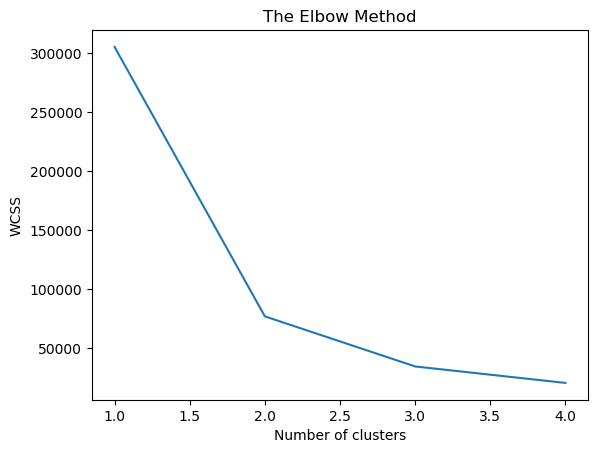

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(encoded_words.reshape(-1,1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(encoded_words.reshape(-1,1))

In [81]:
for i in range(len(encoded_words)):
    print(encoded_words[i]," ==> K = ",y_kmeans[i])

92  ==> K =  0
125  ==> K =  0
76  ==> K =  0
60  ==> K =  1
8  ==> K =  1
50  ==> K =  1
51  ==> K =  1
29  ==> K =  1
126  ==> K =  0
83  ==> K =  0
103  ==> K =  0
51  ==> K =  1
136  ==> K =  0
17  ==> K =  1
119  ==> K =  0
92  ==> K =  0
76  ==> K =  0
3  ==> K =  1
135  ==> K =  0
130  ==> K =  0
32  ==> K =  1
73  ==> K =  0
77  ==> K =  0
45  ==> K =  1
76  ==> K =  0
46  ==> K =  1
20  ==> K =  1
21  ==> K =  1
71  ==> K =  0
68  ==> K =  0
5  ==> K =  1
19  ==> K =  1
48  ==> K =  1
104  ==> K =  0
36  ==> K =  1
52  ==> K =  1
62  ==> K =  1
5  ==> K =  1
64  ==> K =  1
71  ==> K =  0
68  ==> K =  0
15  ==> K =  1
67  ==> K =  0
37  ==> K =  1
104  ==> K =  0
123  ==> K =  0
23  ==> K =  1
92  ==> K =  0
76  ==> K =  0
60  ==> K =  1
31  ==> K =  1
107  ==> K =  0
30  ==> K =  1
24  ==> K =  1
63  ==> K =  1
112  ==> K =  0
39  ==> K =  1
135  ==> K =  0
132  ==> K =  0
65  ==> K =  1
107  ==> K =  0
118  ==> K =  0
10  ==> K =  1
44  ==> K =  1
8  ==> K =  1
97  ==> K =  0